# Relatório de Análise Vlll

## Identificando e Removendo Outliers

In [22]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14,6))


In [23]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep= ';' )

<AxesSubplot: >

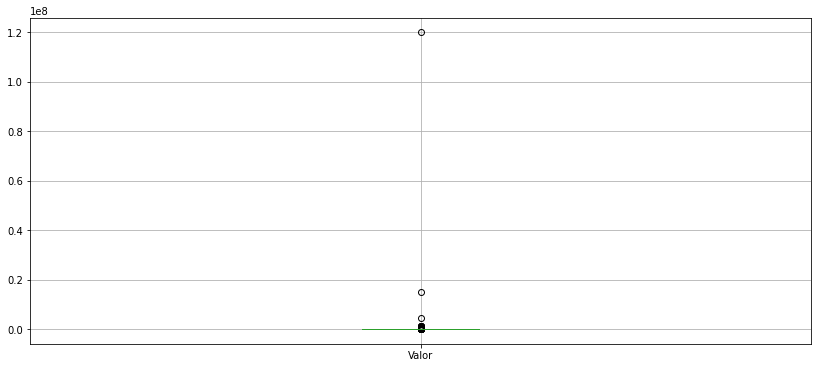

In [24]:
dados.boxplot(['Valor'])

In [25]:
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor metro quadarado bruto,Tipo Agregado
810,Conjunto Comercial/Sala,Barra da Tijuca,0,0,0,5124,614000.0,0.0,0.0,119.828259,Apartamento
866,Conjunto Comercial/Sala,Botafogo,0,56,0,4235,529375.0,114599.0,34345.0,160.169776,Apartamento
1142,Conjunto Comercial/Sala,Cidade Nova,0,47,0,7357,514990.0,166709.0,14787.0,94.669838,Apartamento
2666,Conjunto Comercial/Sala,Centro,0,15,0,5666,530000.0,1.0,1.0,93.540770,Apartamento
2931,Prédio Inteiro,Barra da Tijuca,0,40,0,7500,600000.0,162000.0,13350.0,103.380000,Apartamento
4499,Galpão/Depósito/Armazém,Irajá,0,5,0,1100,15000000.0,0.0,1000.0,13637.272727,Apartamento
4532,Prédio Inteiro,Centro,0,0,0,6986,560000.0,0.0,0.0,80.160321,Apartamento
5448,Conjunto Comercial/Sala,Centro,0,30,0,4940,612550.0,128440.0,0.0,149.997976,Apartamento
5474,Prédio Inteiro,Jacarepaguá,0,15,0,1200,120000000.0,0.0,10000.0,100008.333333,Apartamento
7889,Prédio Inteiro,Centro,0,90,0,7774,505310.0,0.0,0.0,65.000000,Apartamento


In [26]:
valor = dados['Valor']

In [27]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [28]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_novos = dados[selecao]

<AxesSubplot: >

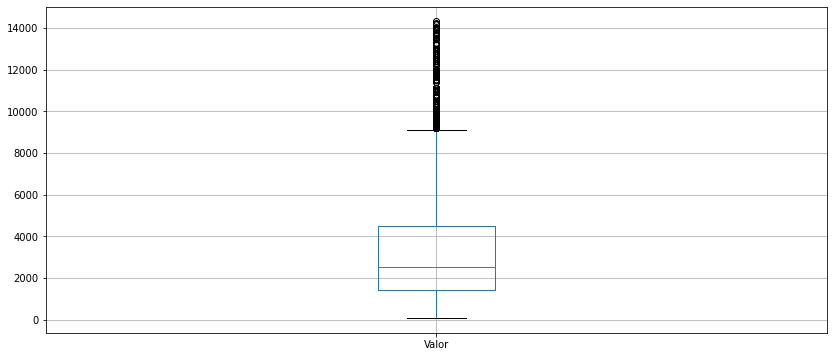

In [29]:
dados_novos.boxplot(['Valor'])

array([[<AxesSubplot: title={'center': 'Valor'}>]], dtype=object)

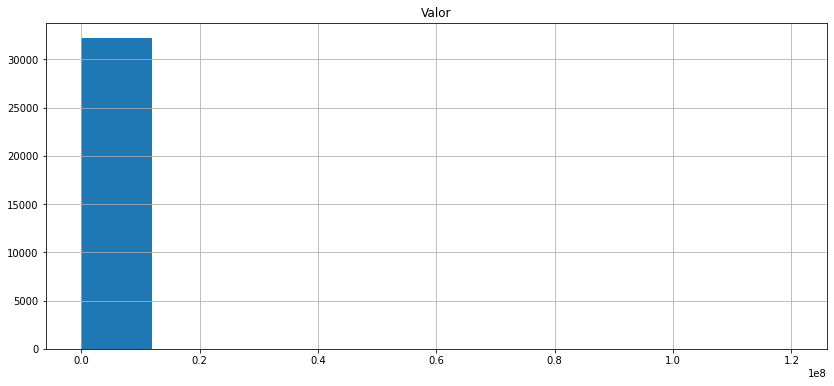

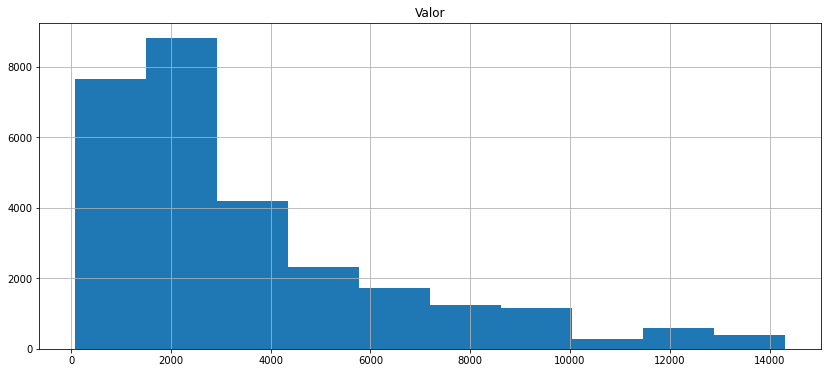

In [30]:
dados.hist(['Valor'])
dados_novos.hist(['Valor'])

In [43]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [32]:
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [33]:
grupo_tipo.groups

{'Apartamento': [3, 4, 5, 9, 10, 11, 13, 17, 18, 19, 21, 22, 25, 26, 28, 30, 31, 32, 34, 35, 38, 39, 41, 42, 45, 46, 47, 48, 49, 52, 53, 54, 55, 58, 60, 61, 62, 63, 64, 65, 66, 68, 69, 71, 73, 74, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 98, 99, 101, 103, 104, 106, 108, 110, 114, 115, 117, 118, 120, 121, 122, 127, 128, 129, 130, 131, 133, 135, 136, 137, 143, 144, 148, 149, 150, 154, 156, 158, 159, 160, 161, 162, 165, 168, 172, 174, 175, 177, ...], 'Box/Garagem': [201, 363, 568, 867, 993, 1606, 1633, 1815, 1908, 2453, 3020, 3398, 3513, 3531, 3706, 3782, 3882, 3922, 4188, 5759, 5990, 6625, 7017, 7285, 7758, 9034, 9103, 9121, 9508, 10071, 10230, 11225, 11782, 11843, 11950, 12470, 12490, 12947, 13570, 13651, 14763, 15264, 15889, 16133, 17012, 17226, 17675, 18350, 18671, 19138, 19584, 19828, 20326, 20776, 20858, 21190, 21829, 21841, 22042, 23410, 23906, 24230, 24496, 24628, 24802, 25046, 25734, 26135, 26204, 27029, 28012, 28028, 28029, 28262, 28760, 29379, 29561, 30150, 30454, 30914,

In [34]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [35]:
Q1

Tipo
Apartamento                      1700.0
Box/Garagem                       250.0
Casa                             1100.0
Casa Comercial                   6000.0
Casa de Condomínio               4000.0
Casa de Vila                      750.0
Chácara                          4900.0
Conjunto Comercial/Sala          1000.0
Flat                             2500.0
Galpão/Depósito/Armazém          7000.0
Hotel                           18500.0
Indústria                      120000.0
Loft                             1750.0
Loja Shopping/ Ct Comercial      1500.0
Loja/Salão                       2200.0
Loteamento/Condomínio           14000.0
Pousada/Chalé                    1480.0
Prédio Inteiro                  14900.0
Quitinete                         900.0
Studio                           1500.0
Sítio                            9750.0
Terreno Padrão                   8000.0
Name: Valor, dtype: float64

In [36]:
limite_superior

Tipo
Apartamento                      9950.0
Box/Garagem                       750.0
Casa                            22850.0
Casa Comercial                  36000.0
Casa de Condomínio              32125.0
Casa de Vila                     3375.0
Chácara                          4900.0
Conjunto Comercial/Sala         23375.0
Flat                            11250.0
Galpão/Depósito/Armazém         58875.0
Hotel                           51000.0
Indústria                      120000.0
Loft                             4875.0
Loja Shopping/ Ct Comercial     11500.0
Loja/Salão                      26700.0
Loteamento/Condomínio           41500.0
Pousada/Chalé                    1480.0
Prédio Inteiro                 177650.0
Quitinete                        2400.0
Studio                           3875.0
Sítio                           22875.0
Terreno Padrão                  88000.0
Name: Valor, dtype: float64

In [37]:
limite_inferior

Tipo
Apartamento                     -3250.0
Box/Garagem                       -50.0
Casa                           -11950.0
Casa Comercial                 -12000.0
Casa de Condomínio             -12875.0
Casa de Vila                     -825.0
Chácara                          4900.0
Conjunto Comercial/Sala        -12425.0
Flat                            -2750.0
Galpão/Depósito/Armazém        -24125.0
Hotel                           -1000.0
Indústria                      120000.0
Loft                             -125.0
Loja Shopping/ Ct Comercial     -4500.0
Loja/Salão                     -12500.0
Loteamento/Condomínio           -2500.0
Pousada/Chalé                    1480.0
Prédio Inteiro                 -82750.0
Quitinete                           0.0
Studio                             75.0
Sítio                            1875.0
Terreno Padrão                 -40000.0
Name: Valor, dtype: float64

In [38]:
limite_superior['Apartamento']

9950.0

In [44]:
for tipo in grupo_tipo.groups.keys():
    print(tipo)

Apartamento
Box/Garagem
Casa
Casa Comercial
Casa de Condomínio
Casa de Vila
Chácara
Conjunto Comercial/Sala
Flat
Galpão/Depósito/Armazém
Hotel
Indústria
Loft
Loja Shopping/ Ct Comercial
Loja/Salão
Loteamento/Condomínio
Pousada/Chalé
Prédio Inteiro
Quitinete
Studio
Sítio
Terreno Padrão


In [45]:
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados[selecao]

In [46]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

<AxesSubplot: title={'center': 'Valor'}, xlabel='[Tipo]'>

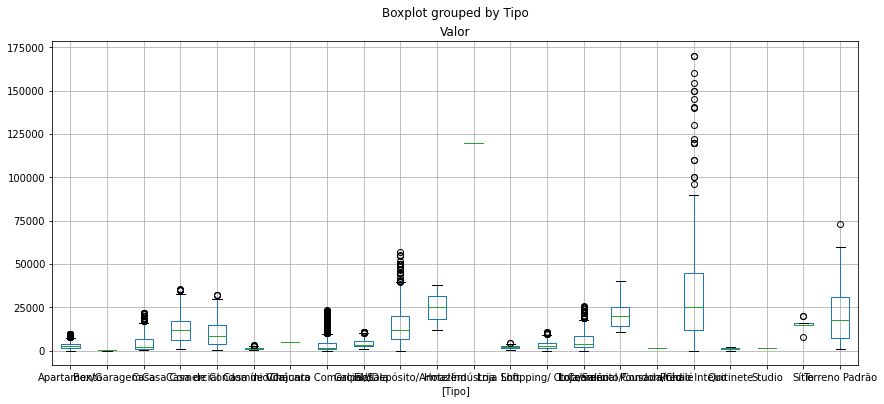

In [47]:
dados_new.boxplot(['Valor'], by = ['Tipo'])

In [48]:
dados_new.to_csv('dados/aluguel_residencial_sem_outliers.csv', sep = ';', index = False)